In [2]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import zipfile
from getCitiBikeCSV import getCitiBikeCSV
import pylab as pl
%pylab inline


import geopandas as gp

import os
import sys
import json
import datetime
import urllib

%pylab inline

from pandas.tools.plotting import scatter_matrix

import csv
import requests

Populating the interactive namespace from numpy and matplotlib


In [385]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [386]:
bike = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [387]:
bike.drop(['tripduration', 'starttime', 'stoptime', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'bikeid', 'birth year'], axis=1, inplace=True)

In [388]:
bike.rename(columns={'start station latitude':'latitude', 'start station longitude':'longitude',\
                     'start station id': 'station_id'}, inplace = True)
#bblnrgdata = pd.merge(nrg, bsize, how='inner', on='BBL')

In [389]:
bike.head()

,station_id,start station name,latitude,longitude,usertype,gender
0,455,1 Ave & E 44 St,40.750020,-73.969053,Subscriber,2
1,434,9 Ave & W 18 St,40.743174,-74.003664,Subscriber,1
2,491,E 24 St & Park Ave S,40.740964,-73.986022,Subscriber,1
3,384,Fulton St & Waverly Ave,40.683178,-73.965964,Subscriber,1
4,474,5 Ave & E 29 St,40.745168,-73.986831,Subscriber,1


In [359]:
station_men = bike.station_id[bike.gender==1].groupby([bike.station_id]).count()
stations = pd.DataFrame(station_men)
stations.rename(columns={'station_id':'rides_men'}, inplace = True)
#makes a df with station id as the index and male counts as values in first column

In [363]:
station_women = bike.station_id[bike.gender==2].groupby([bike.station_id]).count()
stationsw = pd.DataFrame(station_women)
stationsw.rename(columns={'station_id':'rides_women'}, inplace = True)

In [364]:
print (stations.head())
print (stationsw.head())
#stations = bike.station_id.unique
#stations = pd.DataFrame(stations)
#bike['rides_women'] = bike.groupby('station_id')['station_id'].transform('count')

            rides_men
station_id           
72                517
79                444
82                239
83                207
116              1342
            rides_women
station_id             
72                  113
79                  111
82                   67
83                   40
116                 338


In [409]:
station_data = pd.merge(stations, stationsw, how='inner', left_index=True, right_index=True)

In [413]:
station_data.reset_index(inplace=True)

In [414]:
#station_data['station_id'] = station_data.index
station_data.head()

,station_id,rides_men,rides_women
0,72,517,113
1,79,444,111
2,82,239,67
3,83,207,40
4,116,1342,338


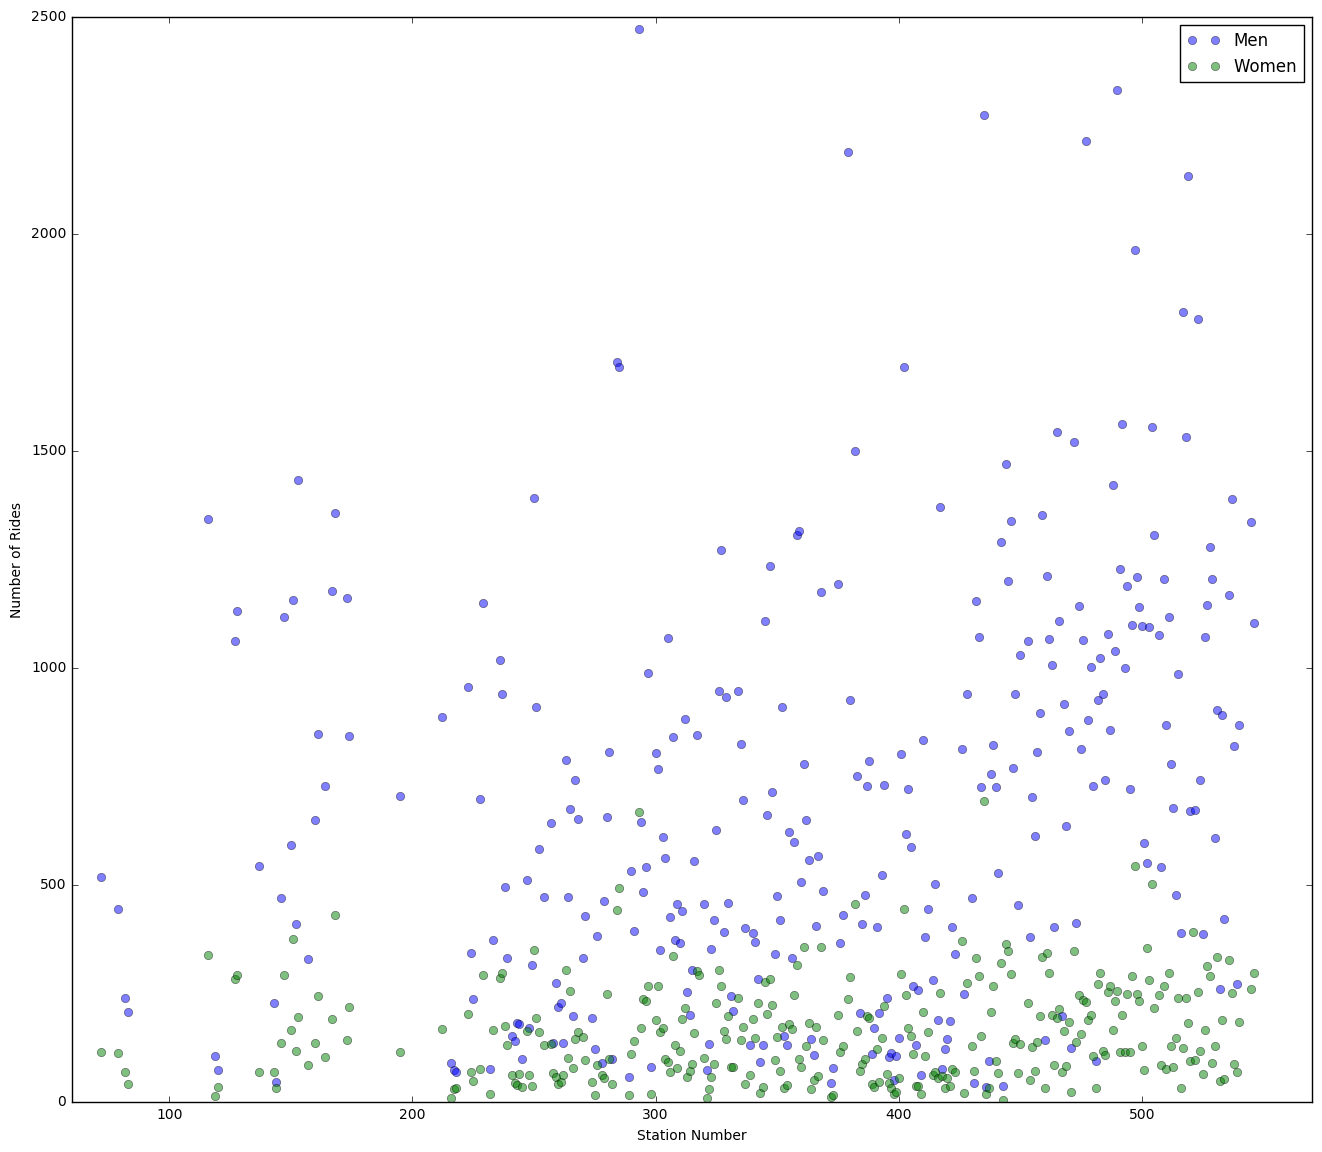

In [445]:
pl.figure(figsize=(16, 14))
pl.plot(station_data.station_id, station_data.rides_men, 'o', alpha=0.5, label='Men')
pl.axis(xmin=60, xmax=570, ymax=2500)
pl.plot(station_data.station_id, station_data.rides_women, 'o', alpha=0.5, label='Women')
pl.xlabel('Station Number')
pl.ylabel('Number of Rides')
pl.legend()

## Figure 1: Number of male and female riders versus the citibike station number (absolute counts from January, 2015).